### Leader-Follower Consensus Explained

is a type of consensus algorithm in multi-agent systems where one or more agents are designated as leaders, and the remaining agents (followers) adjust their states to match the leaders' states. This approach is useful in scenarios where certain agents need to guide the overall behavior of the system.

In a leader-follower consensus, the leader agents have predefined trajectories or states, and the followers update their states based on the states of their neighbors and the leaders. The goal is for all agents to eventually follow the leader's state.

Mathematically, if we denote the state of agent $i$ at time $t$ as $x_i(t)$, the update rule for a follower agent can be expressed as:

$$
x_i(t+1) = x_i(t) + \sum_{j \in \mathcal{N}_i} a_{ij} (x_j(t) - x_i(t)) + b_i (x_L(t) - x_i(t))
$$

where:
- $\mathcal{N}_i$ is the set of neighbors of agent $i$,
- $a_{ij}$ are the weights of the connections between agents,
- $b_i$ is the weight of the influence of the leader $L$ on agent $i$,
- $x_L(t)$ is the state of the leader at time $t$.

### Visual Example

Let's consider a simple network with one leader (L) and three followers (A, B, C):

```
L
|
A -- B -- C
```

- **Initial States**: Suppose the initial states of the agents are:
  - $x_L(0) = 10$
  - $x_A(0) = 4$
  - $x_B(0) = 2$
  - $x_C(0) = 8$

- **First Update**:
  - Agent A: $x_A(1) = x_A(0) + a_{AL}(x_L(0) - x_A(0)) + a_{AB}(x_B(0) - x_A(0))$
  - Agent B: $x_B(1) = x_B(0) + a_{BA}(x_A(0) - x_B(0)) + a_{BC}(x_C(0) - x_B(0))$
  - Agent C: $x_C(1) = x_C(0) + a_{CB}(x_B(0) - x_C(0))$

### Python Code Example with Plot

Here's a Python example to simulate the leader-follower consensus and visualize the states of the agents over the iterations using Matplotlib:


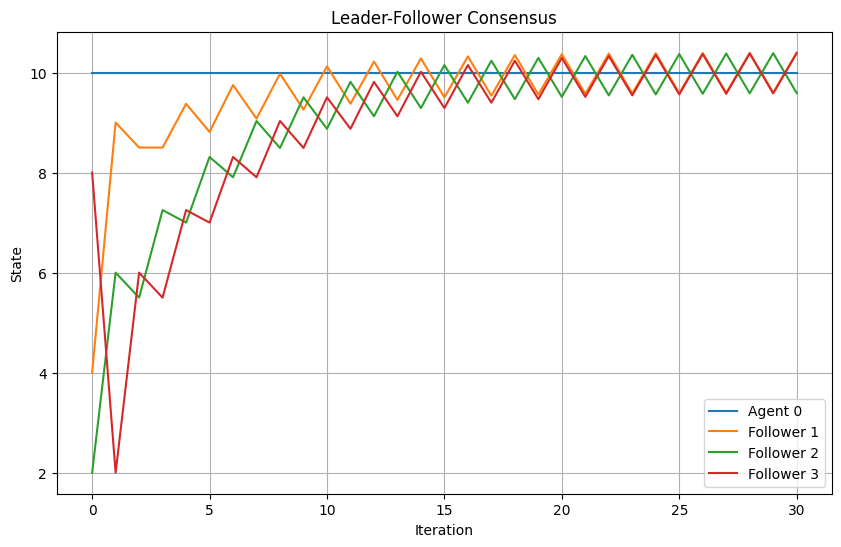

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states of the agents
states = np.array([10, 4, 2, 8], dtype=float)  # L, A, B, C

# Adjacency matrix representing the network
# L
# |
# A -- B -- C
adj_matrix = np.array([
    [0, 1, 0, 0],  # L
    [1, 0, 1, 0],  # A
    [0, 1, 0, 1],  # B
    [0, 0, 1, 0]   # C
])

# Weights for the influence of the leader
leader_weight = np.array([0, 0.5, 0, 0])

def leader_follower_consensus(states, adj_matrix, leader_weight, iterations=10):
    num_agents = len(states)
    history = [states.copy()]
    for _ in range(iterations):
        new_states = states.copy()
        for i in range(1, num_agents):  # Skip the leader (index 0)
            neighbors = np.where(adj_matrix[i] == 1)[0]
            new_states[i] = states[i] + leader_weight[i] * (states[0] - states[i])
            for j in neighbors:
                new_states[i] += (states[j] - states[i]) / len(neighbors)
        states = new_states
        history.append(states.copy())
    return np.array(history)

# Run the consensus algorithm
iterations = 30
history = leader_follower_consensus(states, adj_matrix, leader_weight, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(history.shape[1]):
    plt.plot(history[:, i], label=f'Agent {i}' if i == 0 else f'Follower {i}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Leader-Follower Consensus')
plt.legend()
plt.grid(True)
plt.show()



### Explanation

1. **Initial States**: We start with the initial states of the agents, including the leader.
2. **Adjacency Matrix**: This matrix represents the connections between the agents.
3. **Leader Weight**: This array represents the influence of the leader on each follower.
4. **Leader-Follower Consensus Function**: This function iteratively updates the states of the agents based on the leader's state and the states of their neighbors.
5. **Plotting**: After running the consensus algorithm, we plot the states of each agent over the iterations using Matplotlib.

When you run this code, you will see a plot showing how the states of the followers converge to the leader's state over time.
